<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-1/blob/main/Question2/Implementation_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise Description:**

Your tasked with developing a ML model for lung cancer prediction. Given
information about the patient, such as their sex, age, allergies, etc, your model
should predict whether or not they have lung cancer. You can use this dataset
to train your model.

**(a)** Use statistical methods and graphs/plots to describe your daataset.

**(b)** Split your dataset into train and test sets with a 7:3 ratio. Use the
train_test_split tool from scikit-learn.

**(c)** Build and train a Logistic Regression model using scikit-learn. Explore the
parameters of the model in scikit-learn, and aim for higher classification
accuracies.

**(d)** Report and discuss the performance of your developed model on both the
train and test sets (separately). You can use scikit-learn’s classification
report tool.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import classification_report
from prettytable import PrettyTable

sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

In [ ]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question2/lung_cancer_dataset.csv")
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  33
Number of rows with NaNs is:  0


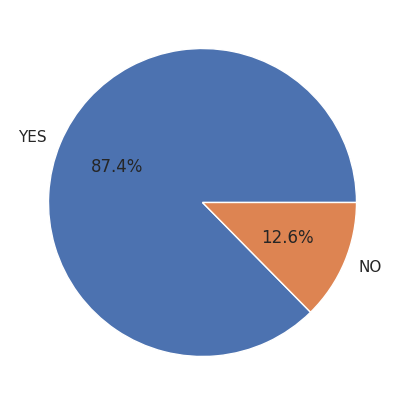

In [ ]:
y =df['LUNG_CANCER']
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [ ]:
 #give unique number to unique string in every object column
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480
5,-1.049781,1.503825,-1.135292,0.869300,-0.996769,-1.003241,0.990338,0.696833,0.892475,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480
6,0.952579,-1.302078,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475
7,-1.049781,-1.424074,0.880830,0.869300,1.003241,0.996769,-1.009756,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,-1.120480
8,-1.049781,0.649855,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,-1.120480,-1.120480,-1.120480,-1.173424,-1.335584,-0.940291,-1.120480
9,0.952579,-1.180082,0.880830,0.869300,1.003241,0.996769,0.990338,-1.435063,0.892475,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475


# **Correlation**

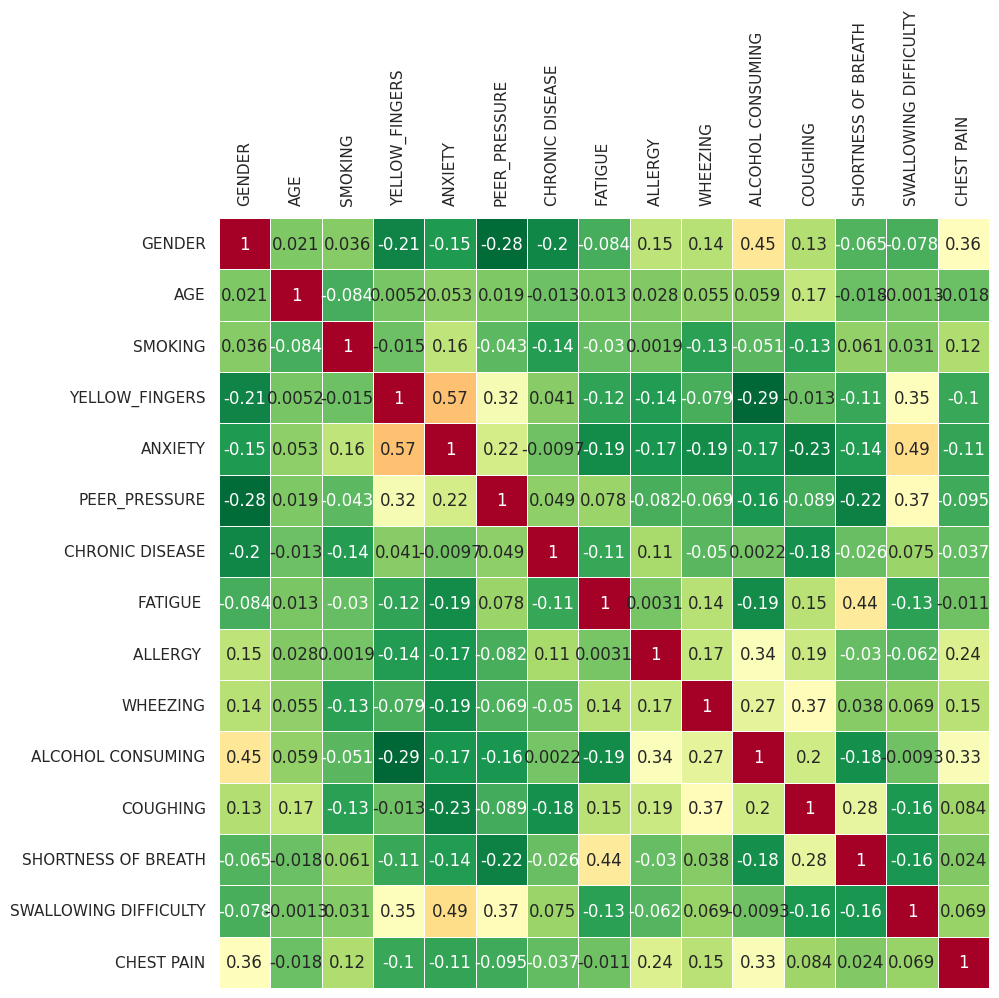

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

# **Split the dataset**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X,y, test_size=0.3)

# **Build and train a Linear Regression model**

In [ ]:
linear_model = sklearn.linear_model.LogisticRegression(random_state=0) #Note: I tested all the solver and I found that lbfgs is the solver that gives the small training error
training = linear_model.fit(X_train,y_train)

In [ ]:
acc_training = linear_model.score(X_train, y_train)
print(f'{round((acc_training)*100,2)}% training accuracy')
print(f'{round((1-acc_training)*100,2)}% training error')

95.37% training accuracy
4.63% training error


In [ ]:
predictions = linear_model.predict(X_test)
report = classification_report(y_test, predictions, output_dict=True, zero_division = False)
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    table.add_row([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

print(f'Classification report: ', {table})

acc_test = linear_model.score(X_test, y_test)
print(f'{round((1-acc_test)*100,2)}% test error')

Classification report:  {+-------+--------------------+--------------------+--------------------+---------+
| Class |     Precision      |       Recall       |      F1-Score      | Support |
+-------+--------------------+--------------------+--------------------+---------+
|   NO  |        0.75        |        0.4         | 0.5217391304347827 |    15   |
|  YES  | 0.8941176470588236 | 0.9743589743589743 | 0.9325153374233129 |    78   |
+-------+--------------------+--------------------+--------------------+---------+}
11.83% test error
